# I. Introduction
> **Name** : Dafa Wiratama
> **Batch** : Data Science - Batch 09
>
> **Dashboard** : [https://telco-customer-churn-h8.herokuapp.com/](https://telco-customer-churn-h8.herokuapp.com/)
>
> Dataset : [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?datasetId=13996&sortBy=voteCount)
>
> The data set includes information about:
> - Customers who left within the last month – the column is called Churn
> - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
> - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
> - Demographic info about customers – gender, age range, and if they have partners and dependents

> ## What is Customer Churn?
> Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.
>
> Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.
>
> Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.
>
> Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

> ## Objective
> Create a model that predicts whether a customer will leave within the next month.
> Create an Interactive Dashboard so Marketing can use the model to predict whether a customer will leave within the next month.

# II. Libraries Import

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import roc_curve
from keras import layers, models, metrics
from sklearn import preprocessing, compose
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [2]:
SEED = 13
np.random.seed(SEED)
tf.random.set_seed(SEED)

# III. Data Loading

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


> This dataset contains 21 column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> I suspect that the column 'customerID' is a unique identifier for each customer. so i will drop it.

In [5]:
df['customerID'].is_unique

True

In [6]:
df = df.drop(['customerID'], axis=1)

> This dataset has 16 categorical features:
> - Six binary features (Yes/No)
> - Nine features with three unique values each (categories)
> - One feature with four unique values

> TotalCharges is a numeric feature, but it has a string type something is wrong with the data. so we will check it further.

In [7]:
for column in df.columns:
    print(f"{column} ({df[column].dtype}):", f"\n\t{df[column].unique()}\n")

gender (object): 
	['Female' 'Male']

SeniorCitizen (int64): 
	[0 1]

Partner (object): 
	['Yes' 'No']

Dependents (object): 
	['No' 'Yes']

tenure (int64): 
	[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService (object): 
	['No' 'Yes']

MultipleLines (object): 
	['No phone service' 'No' 'Yes']

InternetService (object): 
	['DSL' 'Fiber optic' 'No']

OnlineSecurity (object): 
	['No' 'Yes' 'No internet service']

OnlineBackup (object): 
	['Yes' 'No' 'No internet service']

DeviceProtection (object): 
	['No' 'Yes' 'No internet service']

TechSupport (object): 
	['No' 'Yes' 'No internet service']

StreamingTV (object): 
	['No' 'Yes' 'No internet service']

StreamingMovies (object): 
	['No' 'Yes' 'No internet service']

Contract (object): 
	['Month-to-month' 'One year' 'Two year']

PaperlessBilling (object):

> So when parsing the data we have some error thrown and from the message it is say that there are space values in the column TotalCharges.

In [8]:
try:
    pd.to_numeric(df.TotalCharges)
except Exception as e:
    print(e)

Unable to parse string " " at position 488


> After some investigation we can see that the missing TotalCharges is happened only when tenure is 0. my assumption is that the missing TotalCharges is because the customer is a new customer. because it only contains 11 rows I will drop those rows.

In [9]:
df[df.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df = df.replace(' ', np.nan).dropna()

In [11]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

# IV. Exploratory Data Analysis (EDA)

In [12]:
def calc_kernel_density(values, n_space=128):
    _space = np.linspace(values.min(), values.max(), n_space)
    _kde = gaussian_kde(values)(_space)
    return _space, _kde

In [13]:
def plot_class_distribution(df, column, target, cumulative=True, n_space=128, ax=plt):
    cumulative_kde = []

    for class_name in sorted(df[target].unique()):
        _values = df[df[target] == class_name][column]
        _space, _kde = calc_kernel_density(_values, n_space)
        cumulative_kde.append((_space, _kde))
        ax.plot(_space, _kde, label='Churn' if class_name == 'Yes' else 'Not Churn')

    if cumulative:
        space, kde = np.zeros(n_space), np.zeros(n_space)
        for _space, _kde in cumulative_kde:
            space = np.linspace(min(min(_space), space.min()), max(max(_space), space.max()), n_space)
            kde += _kde
        ax.plot(space, kde, linestyle=':', label='Cumulative')

        _mean = df[column].mean()

        ax.axvline(_mean, linestyle='--', color='b', label='Mean')
        ax.axvline(df[column].median(), linestyle='--', color='r', label='Median')

        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        lower_bound = (df[column].quantile(0.25) - 3 * iqr) - _mean
        upper_bound = (df[column].quantile(0.75) + 3 * iqr) - _mean

        if lower_bound > df[column].min():
            ax.axvline(lower_bound, linestyle='--', color='y', label='Bound')

        if upper_bound < df[column].max():
            ax.axvline(upper_bound, linestyle='--', color='y', label='Bound')

    ax.set_xlabel(column)
    ax.set_ylabel('Probability')
    ax.legend()

In [14]:
def plot_numerical_analysis(df, column, target, transformer=None, n_space=128):
    df = df.copy()

    fig, ax = plt.subplots(1, 2, figsize=(8 * 2, 6))
    fig.suptitle(column)

    plot_class_distribution(df, column, target, n_space=n_space, ax=ax[0])
    ax[0].set_title(f'Feature Distribution')

    if transformer:
        df[column] = transformer.fit_transform(df[column].values.reshape(-1, 1))
        plot_class_distribution(df, column, target, n_space=n_space, ax=ax[-1])
        ax[-1].set_title(f'Transformed Distribution')
    else:
        ax[-1].remove()

In [15]:
def plot_category_distribution(dataframe, columns: list, target):
    dataframe = dataframe.copy()
    dataframe[target] = dataframe[target] == 'Yes'
    fig, ax = plt.subplots(1, len(columns), figsize=(8 * len(columns), 6))

    for i, col in enumerate(columns):
        _ax = ax[i] if len(columns) > 1 else ax

        _label = dataframe[col].unique()
        _count = dataframe.groupby(col)[target].mean() * 100

        _ax.bar(_label, _count, tick_label=_label)
        _ax.set_title(col.title())
        _ax.set_xlabel(col)
        _ax.set_ylabel('Churn Probability')

> ## Target Distribution
> this dataset has class imbalance. so we will need to do over/under sampling to balance the dataset.

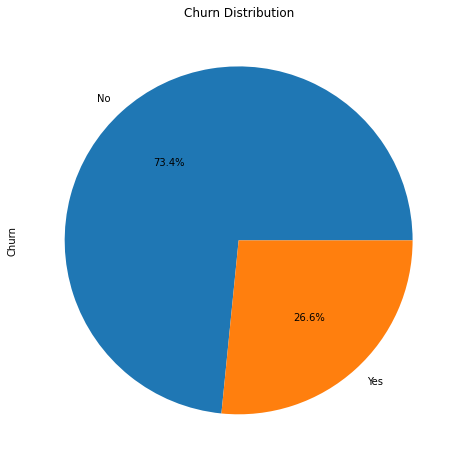

In [16]:
plt.figure(figsize=(8, 8))
plt.title('Churn Distribution')
df.Churn.value_counts().plot(kind='pie', autopct='%1.1f%%');

> ## Feature Correlation
> to better understand the dataset we will try to check the correlation between the features. but first we will convert the categorical features to numerical representation.

In [17]:
_df = df.copy()
for col in _df.select_dtypes(include=['object']).columns:
    _df[col] = _df[col].astype('category').cat.codes
_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


> This correlation map show that the feature have few strong correlation with the target. but it seems that the have very low correlation with other features. so those features will be dropped. but I will try to do further analysis on the features.

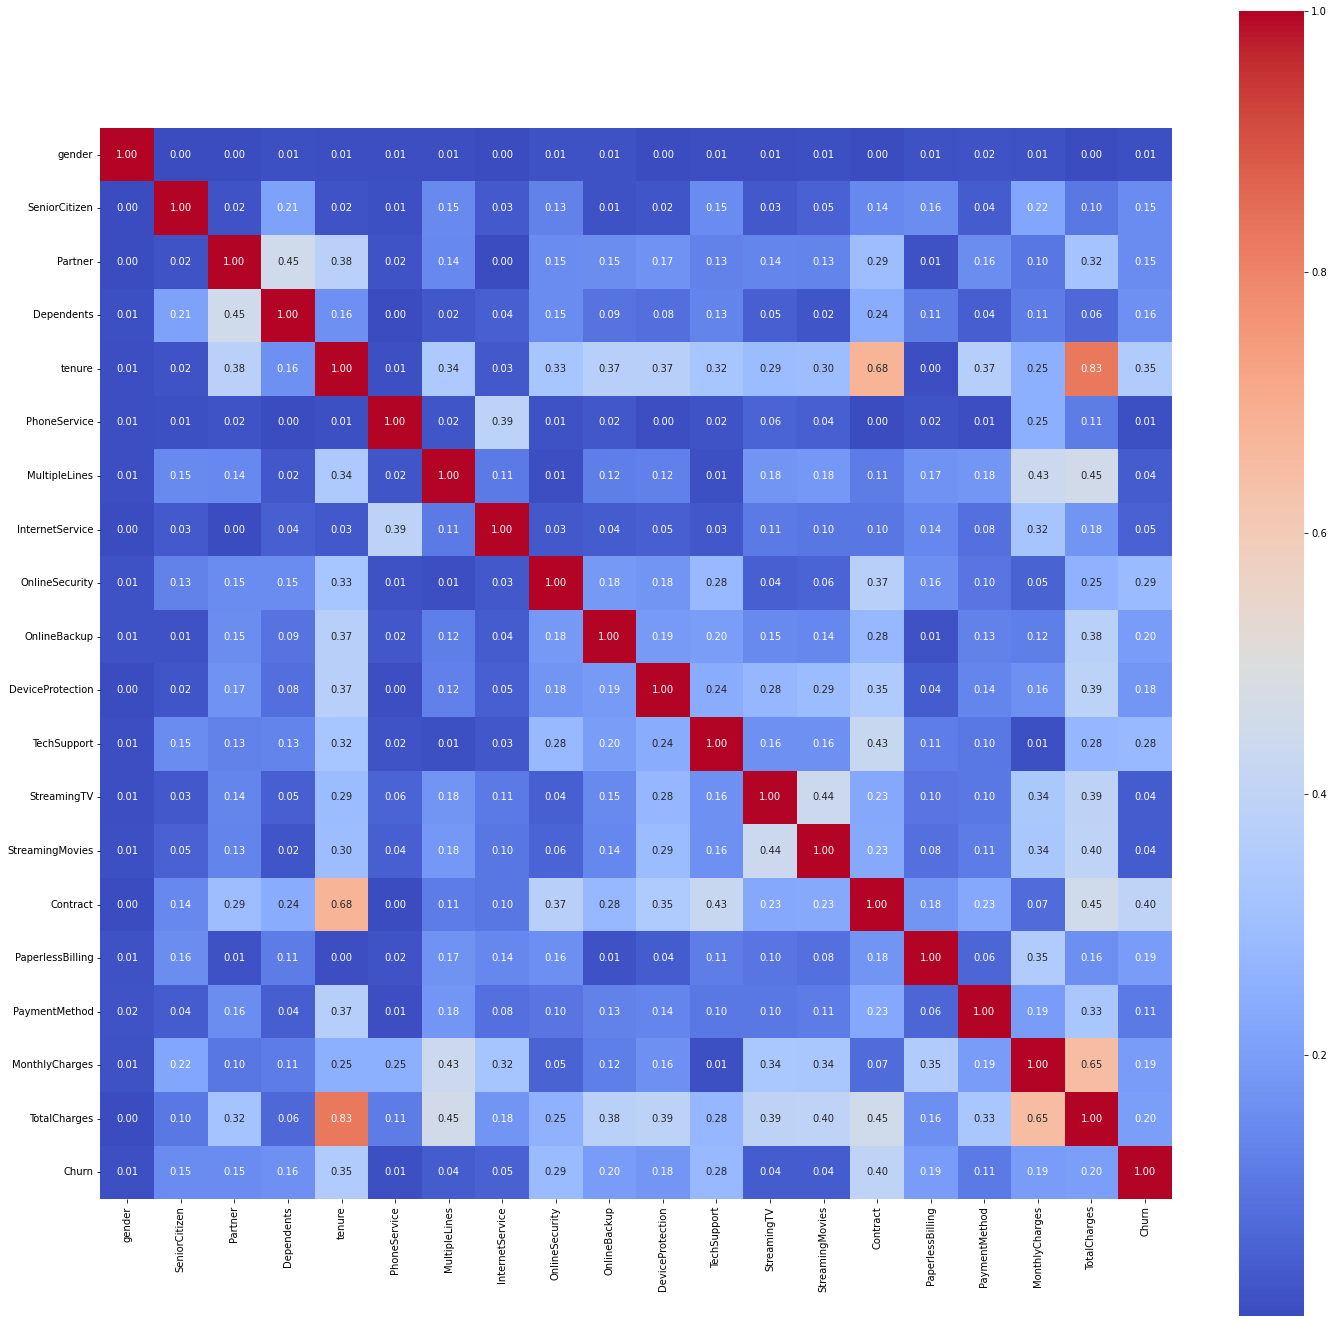

In [18]:
_corr = _df.corr('pearson').abs()

plt.figure(figsize=(8 * 3, 8 * 3))
sns.heatmap(_corr, cmap='coolwarm', annot=True, fmt='.2f', square=True);

> since heatmap is not very good for showing the correlation to the target, we will use a bar plot to show the correlation.

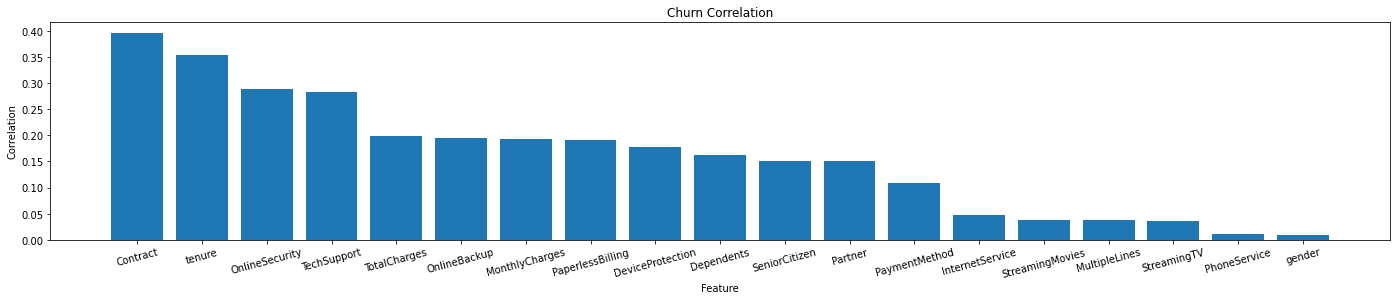

In [19]:
_churn_corr = _corr['Churn']
_churn_corr = _churn_corr.sort_values(ascending=False)
_churn_corr = _churn_corr.drop(['Churn'])
plt.figure(figsize=(8 * 3, 4))
plt.bar(_churn_corr.index, _churn_corr.values)
plt.xticks(rotation=15)
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Churn Correlation');

>> ### Conclusion
>> after plotting the correlation map and bar plot, we can see that some features have very low correlation with the target. but since this column are categorical column that have no ordinal value, I will not drop them and let the model decide which feature to use.

> ## Feature Analysis
>> ### Tenure
>> from the probability distribution of the features, we can see that the features are not normally distributed. so we will try to do some feature engineering to make the features more normal. after the power transformer was applied the features still not normal. but from the class distribution we can see that 2 classes have different distribution peek, so this feature is useful for classification problem. and it seems the longer the tenure more loyal the customer.

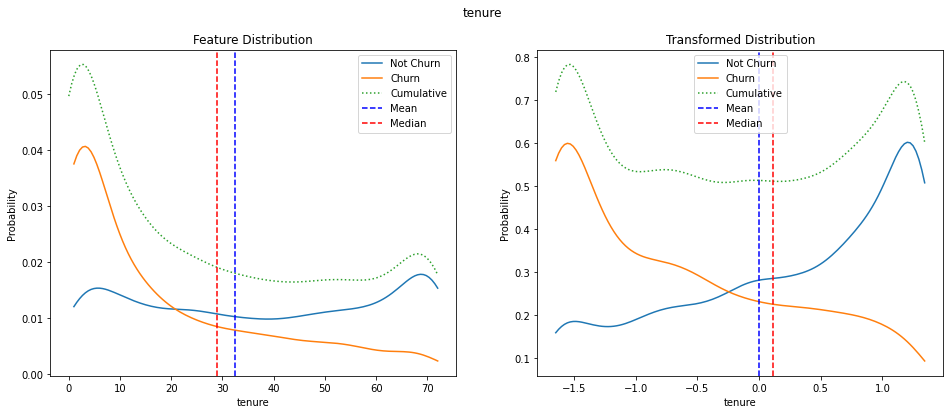

In [20]:
plot_numerical_analysis(df, 'tenure', 'Churn', transformer=PowerTransformer(), n_space=128)

>> ### MonthlyCharges
>> this feature is not normally distributed and the power transformer is not able to make it normal. but it has different class distribution. and from the distribution it seems the higher the monthly charges, the more likely the customer is to churn.

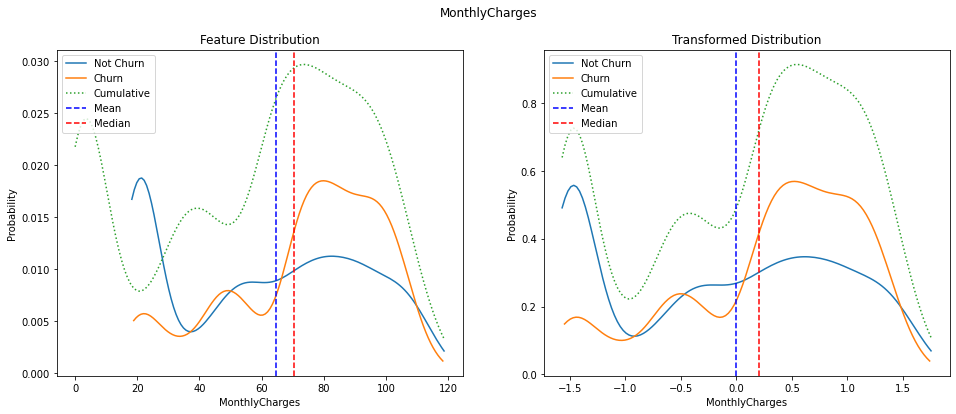

In [21]:
plot_numerical_analysis(df, 'MonthlyCharges', 'Churn', transformer=PowerTransformer(), n_space=128)

>> ### TotalCharges
>> this column is skewed but after transformation the distribution is more normal and the class distribution is also more separated and after transformation we can see that the higher the total charges, the more likely the customer is to not churn.

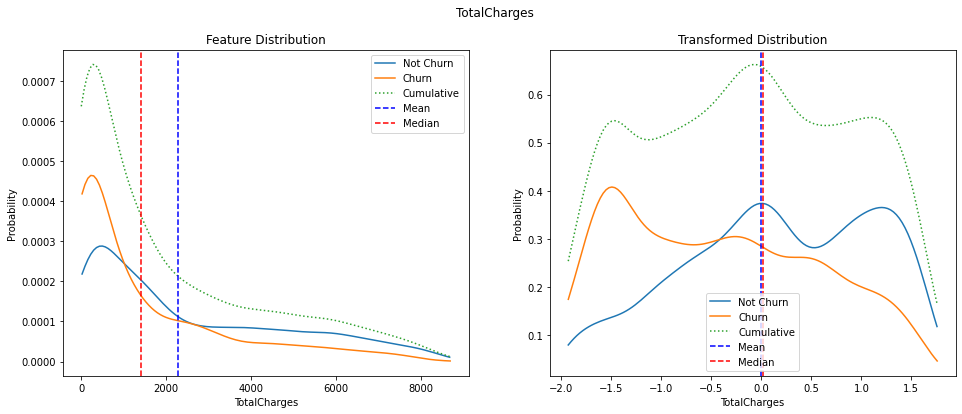

In [22]:
plot_numerical_analysis(df, 'TotalCharges', 'Churn', transformer=PowerTransformer(), n_space=128)

>> ### Categorical Features
>> let's see the distribution of the categorical features.
>
>> from the distribution we can see that male and female has no significant difference to the target value
>
>> In the Seniorcitizen Feature we can see that if the customer an elder citizen they have higher probability to be churn
>
>> and i don't know why but if the customer is single they have lower probability to be churn

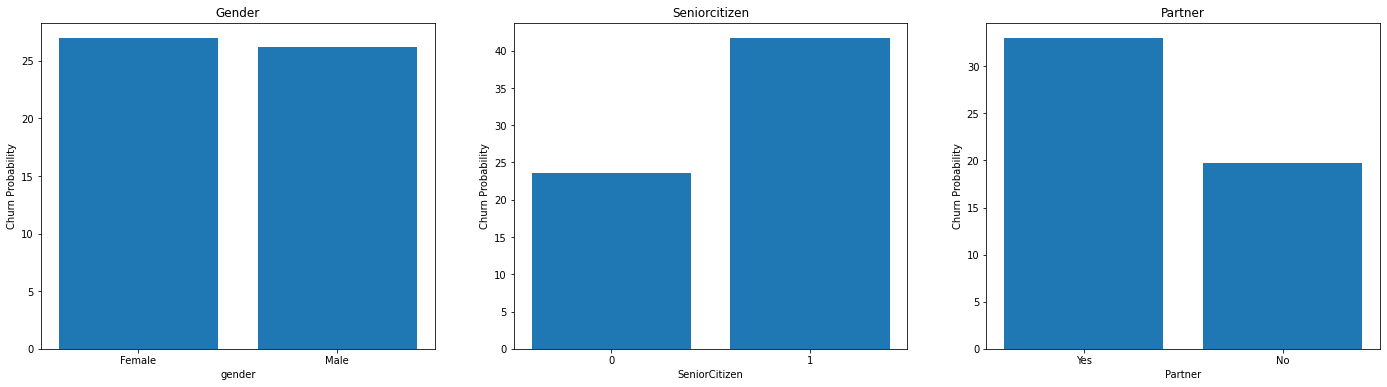

In [23]:
plot_category_distribution(df, ['gender', 'SeniorCitizen', 'Partner'], 'Churn')

>> in the InternetService Feature there is significant difference between Fiber Optic and other I think this is because this telco company have a poor fiber optic network. so it will trigger the customer to become churn.
>
>> the OnlineSecurity Feature have and significant difference between yes and no. and from those difference a think because when the customer is comfortable with the service it ha a correlation with the additional service in other mean this feature is dependent to customer loyalty.

>> then in the Onlinebackup Feature it has the same probability pattern as the OnlineSecurity Feature.

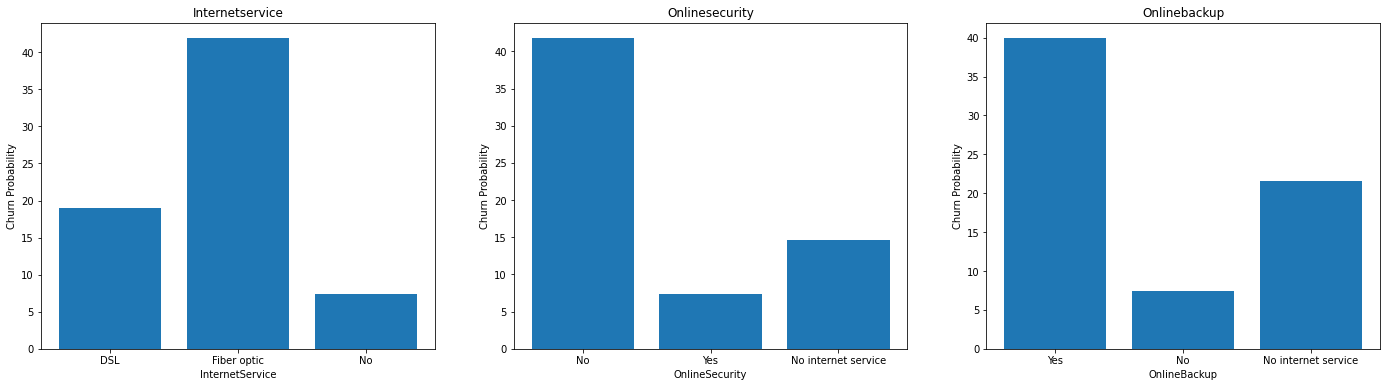

In [24]:
plot_category_distribution(df, ['InternetService', 'OnlineSecurity', 'OnlineBackup'], 'Churn')

>> for this combination i will just wrapup the feature because the all have the same probability pattern like before

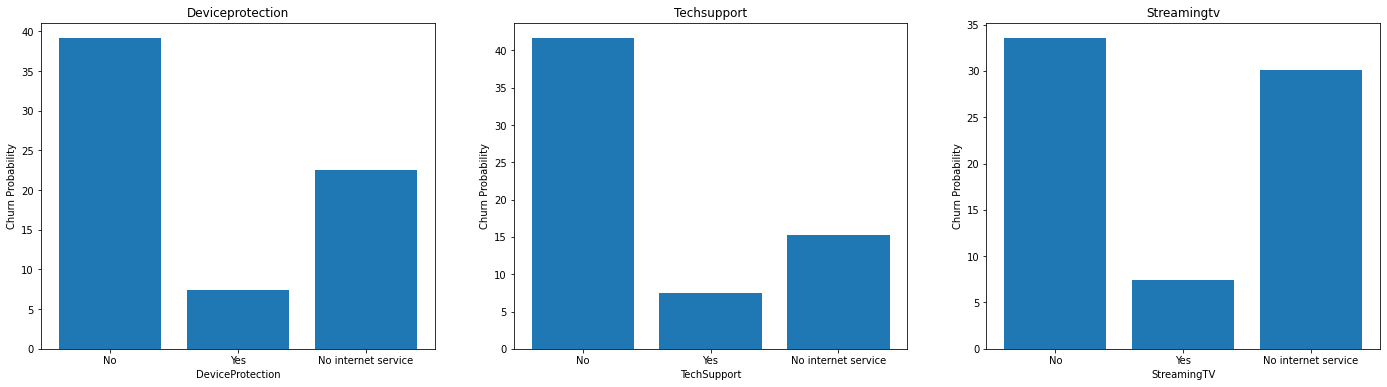

In [25]:
plot_category_distribution(df, ['DeviceProtection', 'TechSupport', 'StreamingTV'], 'Churn')

>> Streamingmovie has same probability pattern as the other dependent feature.
>
>> Contract is and interesting feature because it has a significant difference between the customer who has a contract and the customer who doesn't have a contract. and from the probability difference we can see that if the customer has a contract they have a lower probability to be churn so if we can make the customer to move into contract we can make the customer to be more loyal.
>
>> and for the paperlessbilling there is a difference between yes and no. and from those difference we can see that if the customer has paperless billing they have a lower probability to be churn.

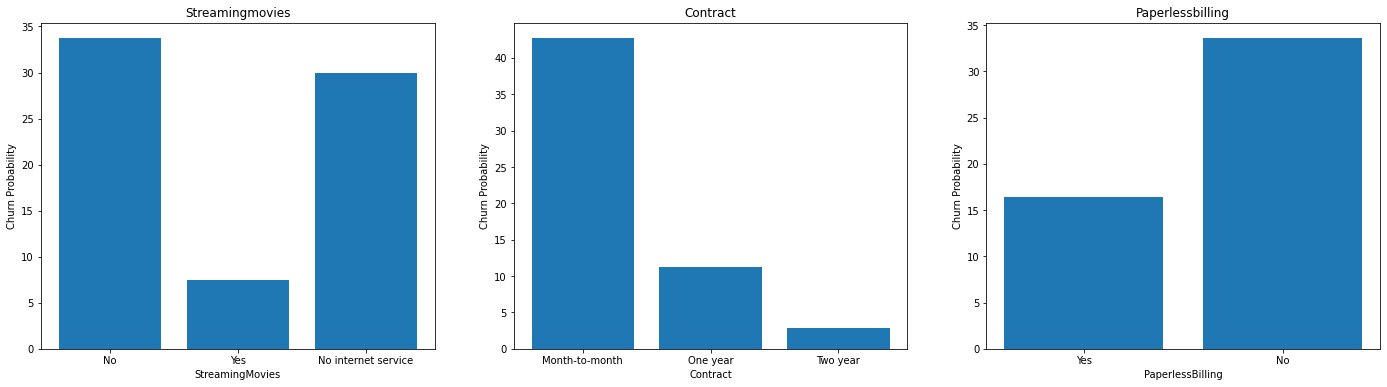

In [26]:
plot_category_distribution(df, ['StreamingMovies', 'Contract', 'PaperlessBilling'], 'Churn')

>> and this feature also good probability pattern that show if the customer is still paying the bill with bank transfer they are more likely to be churn. that the other type of payment

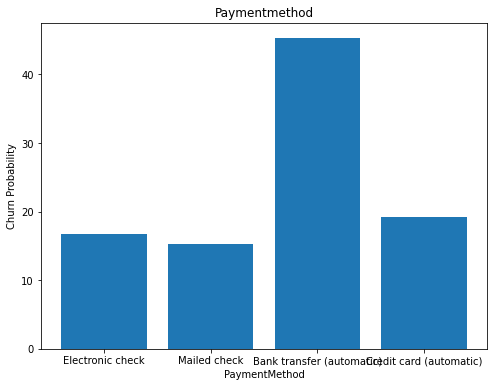

In [27]:
plot_category_distribution(df, ['PaymentMethod'], 'Churn')

>> After we see the correlation between each feature to the target I want to do a cross feature analysis to see if there is any significant feature that can be used to predict the target.
>> in this case i choose tenure, total charges and monthly charges to analyze.
>> and from the scatter we can see that from this 3 feature alone we can have some estimate where the probability of churn is higher. and this make 3 feature to be more important feature.

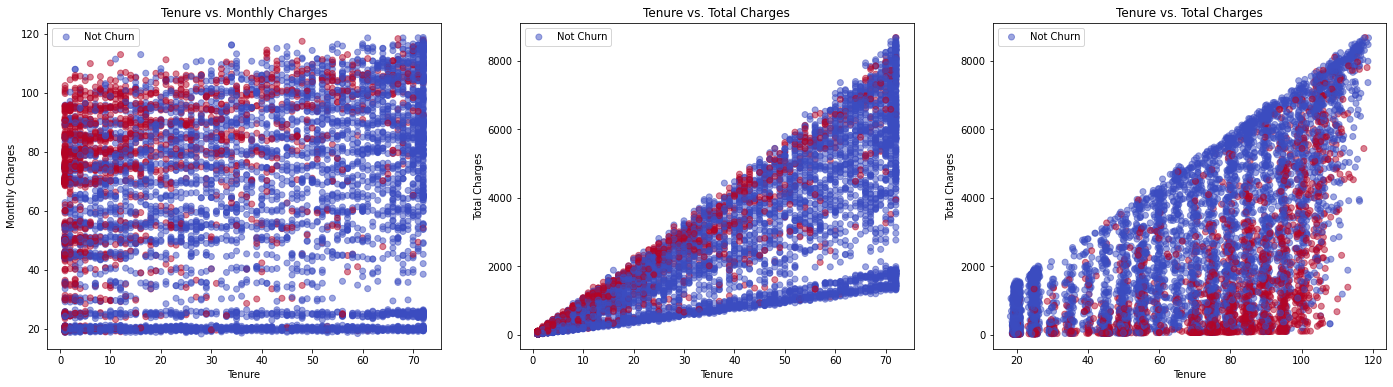

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(8 * 3, 6))

ax[0].scatter(df['tenure'], df['MonthlyCharges'], c=df['Churn'] == 'Yes', cmap='coolwarm', alpha=0.5)
ax[0].set_title('Tenure vs. Monthly Charges')
ax[0].set_xlabel('Tenure')
ax[0].set_ylabel('Monthly Charges')
ax[0].legend(['Not Churn', 'Churn'])

ax[1].scatter(df['tenure'], df['TotalCharges'], c=df['Churn'] == 'Yes', cmap='coolwarm', alpha=0.5)
ax[1].set_title('Tenure vs. Total Charges')
ax[1].set_xlabel('Tenure')
ax[1].set_ylabel('Total Charges')
ax[1].legend(['Not Churn', 'Churn'])

ax[2].scatter(df['MonthlyCharges'], df['TotalCharges'], c=df['Churn'] == 'Yes', cmap='coolwarm', alpha=0.5)
ax[2].set_title('Tenure vs. Total Charges')
ax[2].set_xlabel('Tenure')
ax[2].set_ylabel('Total Charges')
ax[2].legend(['Not Churn', 'Churn']);

> ## Importance of Features
> to make our assumption more solid i will try to train tree model into the dataset that we have and see from the model what are the important features.
> and from the plot we can see that 3 feature that we classify as important feature are important to the model to predict the target. but the other feature are not important to the model. this was chosen because in the dashboard we can see individual feature importance.

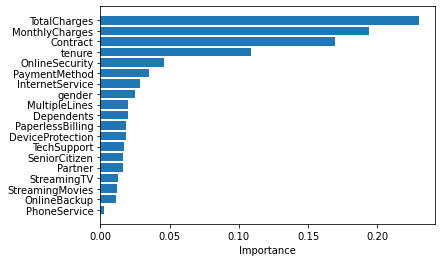

In [29]:
tree = DecisionTreeClassifier(random_state=13)
tree.fit(_df.drop(['Churn'], axis=1), _df['Churn'])

_result = pd.DataFrame(tree.feature_importances_, index=_df.drop(['Churn'], axis=1).columns, columns=['Importance']).sort_values('Importance')
plt.barh(_result.index, _result['Importance'])
plt.xlabel('Importance');

> ## Conclusion
> after we dig deep into our feature analysis we can see that 3 feature is the backbone of our model. but this doesn't mean that the other feature is not important and need tobe discarded. in this case i will use all the feature that we have to train the model since we are using ANN model. this is because it is known that ANN has higher probability to learn a pattern in the data even hidden pattern that us human can't see. so we can use all the feature to train the model.

> ## Personal Judgement
> i think from the analysis that we have done above the most important feature are monthly charges, tenure and somehow Internet service. and from my logical perspective,
>
> people tend to want to pay less for the services, i think another company is charging less for the services.
> and for tenure when the customer already loyal for several months, they are more likely not to be churn.
> then when people have fiber optic service, they are more likely to be churn. this is somehow reflecting the fact that our fiber optic service is not so good. so in this case we need to improve the fiber optic service.


# V. Data Preprocessing
> in this step I will clean the data and drop the duplicate value and split the data into train, validation and test set. to perform some cross validation

In [30]:
_df = df.drop_duplicates()

x = _df.drop(['Churn'], axis=1)
y = _df['Churn'] == 'Yes'

train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.2, stratify=y, random_state=SEED)
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.1, stratify=train_y, random_state=SEED)

> here i will map the feature that i use to the model but we need to do some preprocessing to the data.
> this is because the model only accept numerical value and not categorical value so we will represent the categorical value to numerical value using OneHotEncoder.

In [31]:
preprocessing_pipeline = compose.make_column_transformer(
    (preprocessing.PowerTransformer(), ['MonthlyCharges', 'TotalCharges', 'tenure']),
    (preprocessing.OneHotEncoder(handle_unknown='ignore'), [
        'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
    ]),
)

> after the infrastructure is set up we will preprocess the dataset that we have before we train the model. this is because i dont want any preprocessing when the model is trained in order to achieve faster training time.

In [32]:
BATCH_SIZE = 256

preprocessing_pipeline.fit(train_x), train_y
_val_ds = preprocessing_pipeline.transform(val_x), val_y
_test_ds = preprocessing_pipeline.transform(test_x), test_y

val_ds = tf.data.Dataset.from_tensor_slices(_val_ds).shuffle(1000, SEED).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

> and because we have imbalance problem in our dataset I will use down sampling to balance the dataset. this is because i don't want to resample the data because it is known that down sampling known to increase model performance without changing the data nature.
> because i will only allow the majority class to be resampled 50% at most so we still have some imbalance in the dataset.

In [33]:
n_pos = train_y.sum()
n_neg = train_y.count() - n_pos

sampler = RandomUnderSampler(sampling_strategy={0: int(n_neg / 2)})
train_x, train_y = sampler.fit_resample(train_x, train_y)
train_y.value_counts()

False    1855
True     1337
Name: Churn, dtype: int64

> to counter the still imbalance dataset we will use other technique in this case to adjust the weights of the class to prevent model from biasing toward certain classes

In [34]:
n_pos = train_y.sum()
n_neg = train_y.shape[0] - n_pos
total = n_pos + n_neg

class_weights = {0: (1 / n_neg) * (total / 2.0), 1: (1 / n_pos) * (total / 2.0)}
class_weights

{0: 0.8603773584905661, 1: 1.193717277486911}

> after the imbalance was handled we can proceed to train the model. with the training data

In [35]:
train_ds = preprocessing_pipeline.transform(train_x), train_y

# VI. Model Definition
> for this dataset problem i will create 2 model at the start with the same Hyper-parameter but with only one difference that is the number of hidden layer. to better isolate the performance difference. and in this case i will use 'Feature Extraction Network' or 'Multi-Layer Perceptron' model. one with 4 neurons on first hidden layer and one with 8 neurons on first hidden layer. for the hyperparameter I will use `relu` as hidden activation function the `sigmoid` as output activation. this is because relu have a computational cost and sigmoid because we want 1 class prediction only. and as kernel and bias initialization i will use `glorot_uniform`

In [36]:
def create_sequential_model(input_shape, initializer, name='classifier'):
    return models.Sequential([
        layers.Dense(4, activation='relu', kernel_initializer=initializer, input_shape=input_shape, name='fc_1'),
        layers.Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output'),
    ], name=name)

In [37]:
def create_functional_model(input_shape, initializer, name='classifier'):
    _input = layers.Input(shape=input_shape, name='input')
    _x = layers.Dense(8, activation='relu', kernel_initializer=initializer, name='fc_1')(_input)
    _x = layers.Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output')(_x)
    return models.Model(_input, _x, name=name)

> let's define our model

In [38]:
input_shape = train_ds[0].shape[1:]
initializer = 'glorot_uniform'

seq_model = create_sequential_model(input_shape, initializer=initializer)
func_model = create_functional_model(input_shape, initializer=initializer)

> in the first model we can see that the model was small and only contain 193 weights.

In [39]:
seq_model(train_ds[0][:1])
seq_model.summary()

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc_1 (Dense)                (None, 4)                 188       
                                                                 
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


> an in the second model we can see that the model has more weights this is collinear with the number of neurons in the first hidden layer.

In [40]:
func_model.summary()

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 46)]              0         
                                                                 
 fc_1 (Dense)                (None, 8)                 376       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


# VII. Model Training
> After everything is set up we can train the model. but first i will plot the output of first layer to hee how they behave. before training the model.
> and for this dataset i will use 4 metrics to evaluate the model. i want to see the accuracy, precision, recall and auc. since i will only have 1 class prediction.

In [41]:
y = np.concatenate([y for x, y in val_ds], axis=0)

In [42]:
def plot_layer_latent(model, layer_name, ds):
    x, y = ds[0], ds[1]

    model = models.Model(model.input, model.get_layer(layer_name).output)
    _result = model.predict(x)

    fig, ax = plt.subplots(1, 4, figsize=(8 * 4, 4))
    for i, n in enumerate([0, 1, 2, 3]):
        try:
            ax[i].set_title(f'{layer_name} - {n}')

            _space, _density = calc_kernel_density(_result[:, n][y == 0])
            ax[i].plot(_space, _density, label='Not Churn')

            _space, _density = calc_kernel_density(_result[:, n][y == 1])
            ax[i].plot(_space, _density, label='Churn')
            ax[i].axvline(0, color='k', linestyle='--')
            ax[i].legend()
        except:
            pass

In [43]:
def training_func(model):
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

    model.compile(
        optimizer=optimizer, loss='binary_crossentropy',
        metrics=['acc', metrics.Precision(name='pre'), metrics.Recall(name='rec'), metrics.AUC(name='auc')]
    )

    return model.fit(
        train_ds[0], train_ds[1],
        validation_data=val_ds,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=[early_stopping],
        class_weight=class_weights,
        verbose=0
    )

> nothing to explain here except the output has minimum value of 0 this is because we use `relu` as activation function.

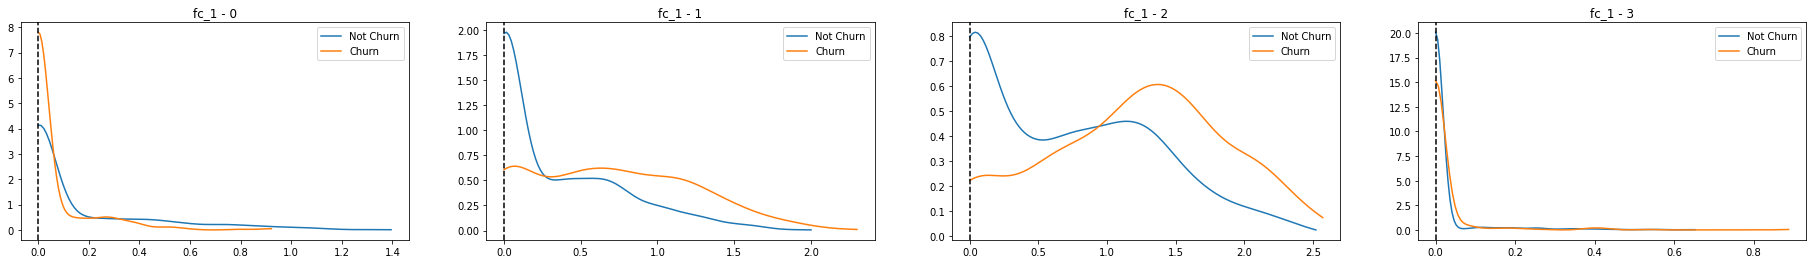

In [44]:
plot_layer_latent(func_model, 'fc_1', _val_ds)

> and in this training i decided to use `Batch Size` of 256 this is because i want the model to be able to generalize better and have stable weight update by drowning outlier correction with the rest of sample . and epoch of `512` is long enough to if the model was created correctly. and the optimizer is `Adam` with learning rate of that has Exponential decay. this is because i want the learning rate to start with a high value and then decay to a lower value. to prevent the model stuck on local minimum. at least that what i hope, and on more thing is early stopping so the model will stop when in detect overwriting then restore the model to the best state, but it will wait 32 epochs and see if the model is still improving.

In [45]:
EPOCHS = 512
STOPPING_PATIENCE = 32

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=train_ds[0].shape[0] // BATCH_SIZE,
    decay_rate=0.96,
    staircase=True
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    restore_best_weights=True,
    monitor='val_loss',
    patience=STOPPING_PATIENCE,
)

In [46]:
seq_model_training = training_func(seq_model)

In [47]:
func_model_training = training_func(func_model)

# VII. Model Evaluation
> This is the judgement part.
> we need to choose the best model by looking at the metrics.

In [48]:
def plot_history(history, metric='loss', ax=plt):
    ax.set_title(f'{metric.capitalize()} vs. Epoch')
    ax.set_xlabel('epoch')
    ax.set_ylabel(metric)
    ax.plot(history.history[metric], label='Training')
    ax.plot(history.history['val_' + metric], label='Validation')
    ax.axvline(x=len(history.history[metric]) - STOPPING_PATIENCE, label='Best Score', color='k', linestyle='--')
    ax.legend()

In [49]:
def plot_training(history, metrics=('loss', 'acc', 'auc')):
    fig, ax = plt.subplots(1, 3, figsize=(8 * 3, 4))
    for i, metric in enumerate(metrics):
        plot_history(history, metric=metric, ax=ax[i])

In [50]:
def plot_roc_curve(model, dataset, label, ax=plt):
    x, y = dataset
    _y = model.predict(x)[:, 0]
    fpr, tpr, _ = roc_curve(y, _y)

    ax.plot(fpr, tpr, label=label)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.xlabel('False Positive Rate')
    ax.ylabel('True Positive Rate')
    ax.title('ROC Curve')
    ax.legend()

> the first model was performing better than I was expecting. but as we can see the model validation performance is not as good as the training performance. but they still follow the same curve to me this was indicating that the model is not overfitting but worse the model was not capable to understand the data i suspect that the model is to small for the dataset problem

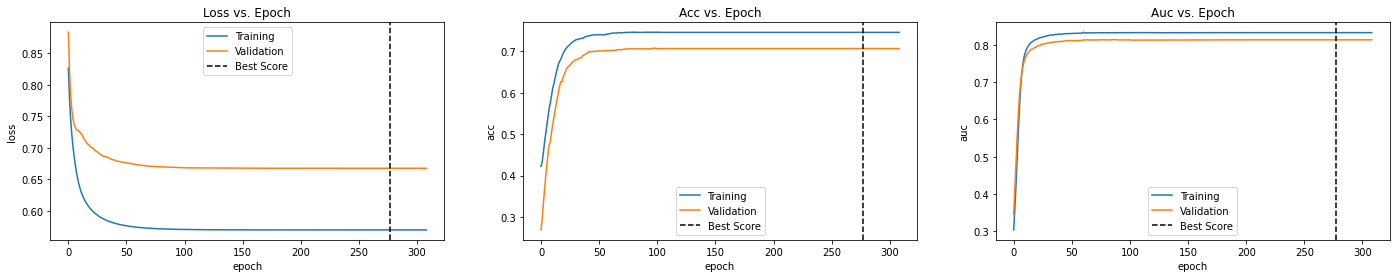

In [51]:
plot_training(seq_model_training)

> and for this model cement my conclusion that the model was to small to learn the problem. because we see an improvement in the loss difference between the training and validation. but the model is not able to generalize well. so to make the model better we should increase the complexity of the model.

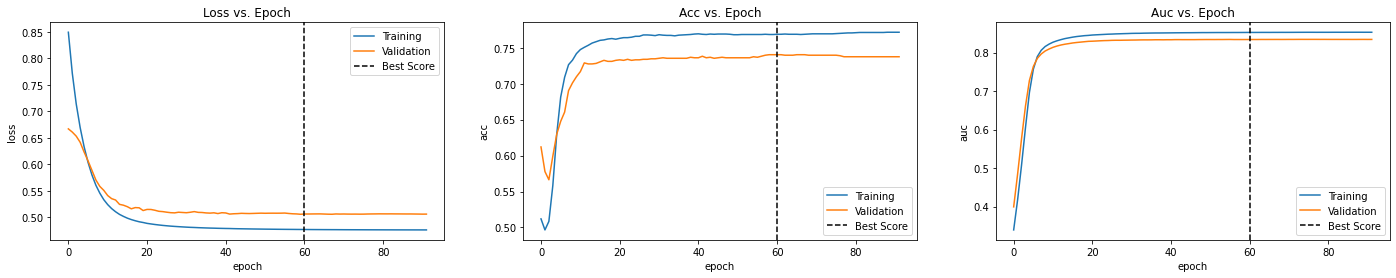

In [52]:
plot_training(func_model_training)

> those 2 model has the same performance. but the model with the lower loss is the better model.

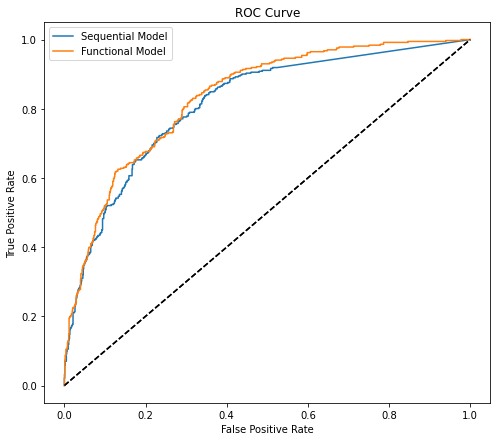

In [53]:
plt.figure(figsize=(8, 7))
plot_roc_curve(seq_model, _val_ds, label='Sequential Model')
plot_roc_curve(func_model, _val_ds, label='Functional Model')

> from the numerical evaluation we can see that the second model is better than the first model in 4 metrics that we define

In [54]:
result = seq_model.evaluate(_test_ds[0], _test_ds[1], verbose=0)
pd.DataFrame(result, index=['loss', 'acc', 'precision', 'recall', 'auc']).T

,loss,acc,precision,recall,auc
0,0.665448,0.7041,0.466135,0.785235,0.808318


In [55]:
result = func_model.evaluate(_test_ds[0], _test_ds[1], verbose=0)
pd.DataFrame(result, index=['loss', 'acc', 'precision', 'recall', 'auc']).T

,loss,acc,precision,recall,auc
0,0.501379,0.755793,0.526786,0.791946,0.83869


> okay let's dissect the model and see what actually is going on the hidden layer i will plot the output of the first layer of the model.

> for the first model we can see that the layer is trying to separate the target from the input. we cansee this by looking from the kernel density the model try to put negative label closer to the 0 and positive label farther from the 0. but at some layer we can only see one class like in layer 1 and 3 this is because known `relu` problem that called dying relu this problem state that because the relu has slope of 0 when the output is less than 0 this will make the neuron to have 0 gradient and the neuron will not learn anything since no gradient was flowing. and make our neuron to die / not doing anything. so for next model we will use another activation function like `leaky_relu` to counter this problem since leaky relu has a slope of 0.1 when the output is less than 0 and 0.01 when the output is greater than 0.

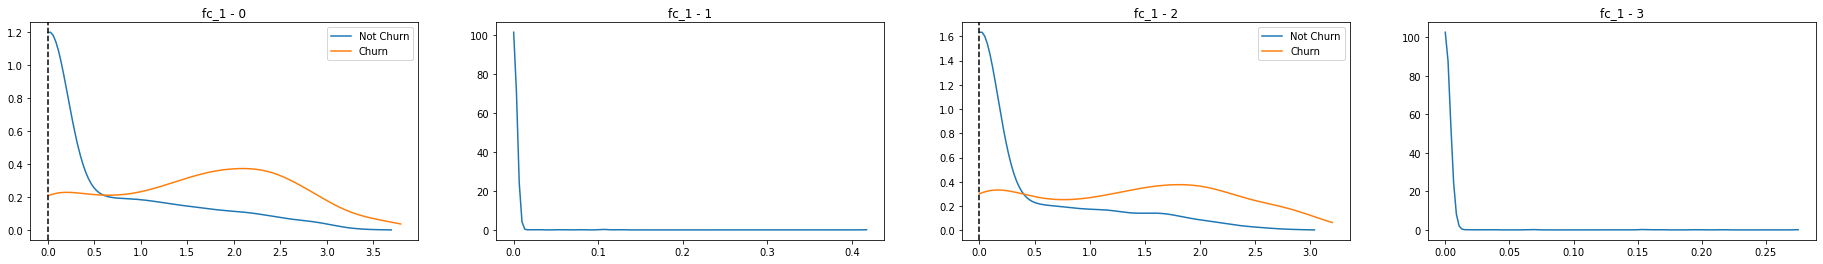

In [56]:
plot_layer_latent(seq_model, 'fc_1', _val_ds)

> from the second model we see that our hypothesis before sill stand true and the layer try to separate the class as far as possible from each other. but somtimes it fail like in the 2 neurons in the layer 1. so for next model we should invest more in the number of layer to help the model to separate the class as far as possible.

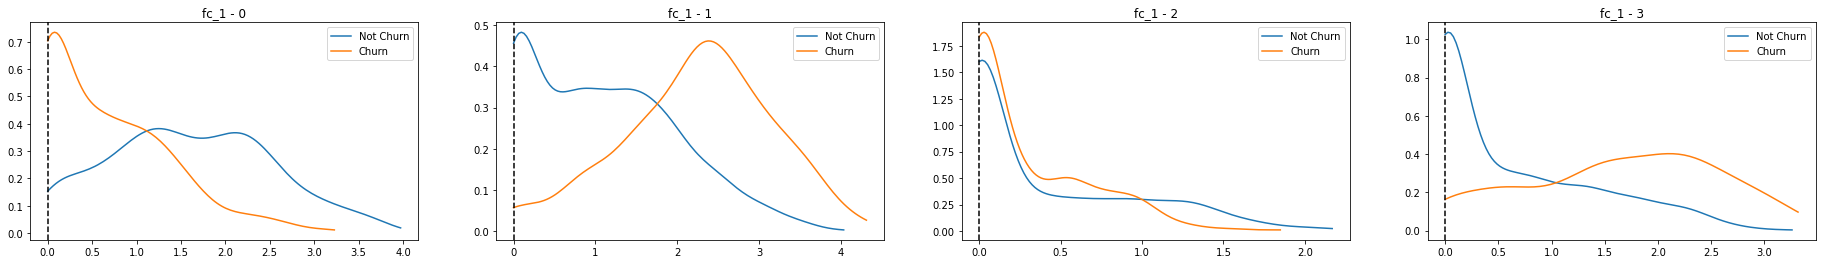

In [57]:
plot_layer_latent(func_model, 'fc_1', _val_ds)

> The new model that i create still follow the same pattern but this time we will use our model known weakness to increase the new model performance.
> - like this time I use 2 layer instead of 1 layer.
> - the first layer have larger number of neuron that previous model.
> - then the second layer have smaller number of neuron that previous model so the model have more flexibility to learn the problem by creating buffer of numerical value before the output layer
> - we will use `leaky_relu` instead of `relu` to counter dying relu problem.
> - and use `dropout` to prevent overfitting.

In [58]:
_input = layers.Input(shape=input_shape, name='input')
_x = layers.Dense(32, activation='leaky_relu', kernel_initializer=initializer, name='fc_1')(_input)
_x = layers.Dropout(0.33, name='dropout_1')(_x)
_x = layers.Dense(8, activation='leaky_relu', kernel_initializer=initializer, name='fc_2')(_x)
_x = layers.Dropout(0.33, name='dropout_2')(_x)
_x = layers.Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output')(_x)
model = models.Model(_input, _x, name='tuned_classifier')

> but this model improvement came with a cost of computational complexity. as we can see from the graph that tensorflow created the model has 1.77 thousand parameters. witch is more than 10x bigger than the previous model.

In [59]:
model.summary()

Model: "tuned_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 46)]              0         
                                                                 
 fc_1 (Dense)                (None, 32)                1504      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 fc_2 (Dense)                (None, 8)                 264       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 1,777
Trainable params: 1,777
Non-tr

> after we plot the model training history we can see that training and validation line are converging to the same point and they follow the same path  but in the accuracy there are slight difference of performance then the AUC is also stable so by looking at 3 metric i like to say that this model is better than the previous model. and we will use this model in the production.

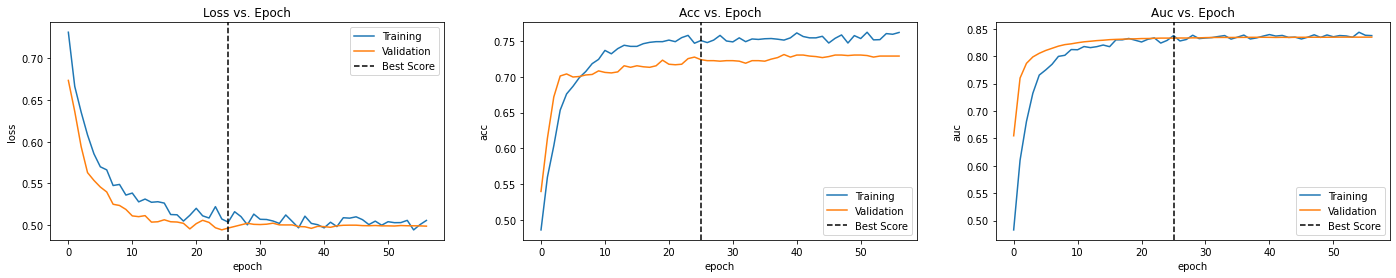

In [60]:
model_training = training_func(model)
plot_training(model_training)

> this numerical evaluation is also showing the same that this model performs better than the previous model. this can be seen from the Cross Entropy Loss that show minor difference in the loss value. but still it perform better than the previous model but at cost of computational complexity. because this model is still small in mty experience i will use this model in the production.

In [61]:
result = model.evaluate(_test_ds[0], _test_ds[1], verbose=0)
pd.DataFrame(result, index=['ce', 'acc', 'precision', 'recall', 'auc']).T

,ce,acc,precision,recall,auc
0,0.500225,0.741533,0.508621,0.791946,0.831946


> okay then it's time to dissect the model hidden neuron and see what the second layer is doing. and how does the change of hyperparameter affect the model performance.

> still same like previous model the first layer still doing the same thing but this time it has privilege to use negative value and the model seems to create separation line on the 0 so one of the class is on the left side of the separation line and the other class is on the right side of the separation line and as you see the output seems to have spiked on the negative value. this is because what `leaky_relu` does is that it will concentrate the negative value into smaller space

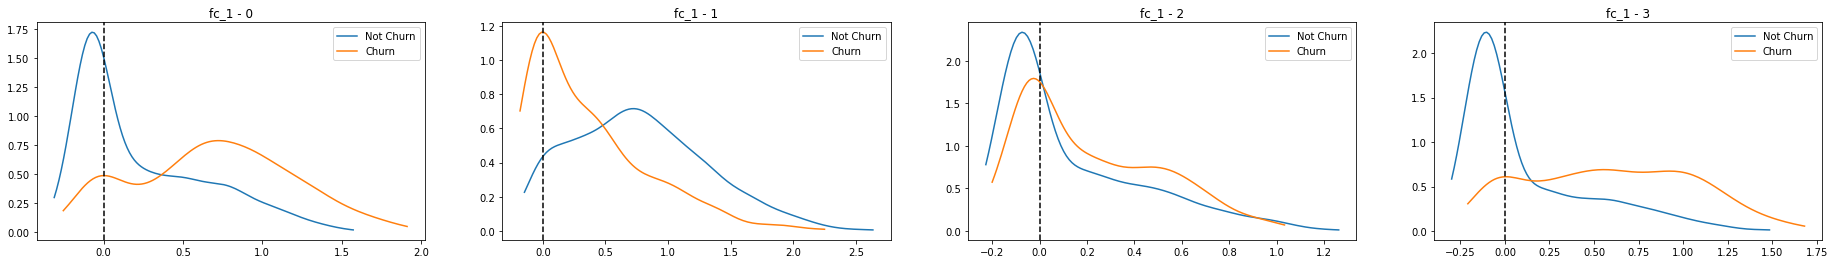

In [62]:
plot_layer_latent(model, 'fc_1', _val_ds)

> and in the second layer we can see that the model was improving the previous layer output and refining the separation of distribution of class to be separated as far as possible. so the addition of 1 layer is a good idea to improve the model performance.

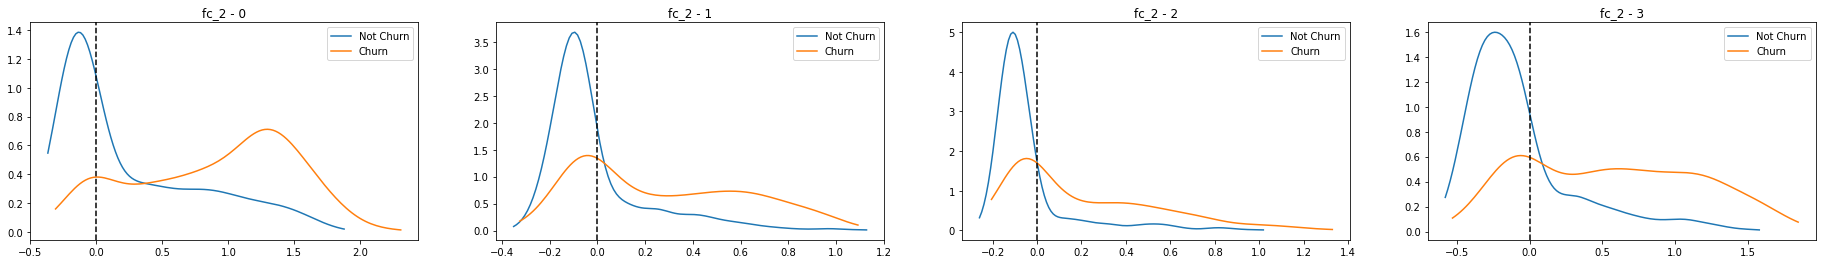

In [63]:
plot_layer_latent(model, 'fc_2', _val_ds)

# IX. Model Saving
> since we have done model improvement we will save the model to use it in the production.
> and because this model was constructed in 2 part we will save the model, and it's infra-structure in this case preprocessing.
> and i will save the input unique value so the front end can use it to make form input.

In [64]:
MODEL_PATH = 'deployment/backend/models'

In [65]:
pickle.dump(preprocessing_pipeline, open(f'{MODEL_PATH}/preprocessing.pkl', 'wb'))

In [66]:
model.save(f'{MODEL_PATH}/model.h5')

In [67]:
categories = {}

for column in df.select_dtypes(exclude=['number']).columns:
    categories[column] = list(df[column].unique())

pickle.dump(categories, open(f'{MODEL_PATH}/categories.pkl', 'wb'))

# X. Model Inference
> this is the last step to be done in the model construction.
> to understand the input by looking at the model point of view but since it has 21 features we will use the 4 categorical features and 2 numerical feature only.

In [68]:
def input_sweep(model, preprocessing, df, num_col, cat_col, sample, ax=plt):
    num_space = np.linspace(df[num_col].min(), df[num_col].max(), num=100)
    cat_space = df[cat_col].unique()

    for cat in cat_space:
        frames = []

        for num in num_space:
            _sample = sample.copy()
            _sample[cat_col] = cat
            _sample[num_col] = num
            frames.append(_sample)

        frames = pd.DataFrame(frames)
        frames = preprocessing.transform(frames)
        ax.plot(num_space, model.predict(frames), label=cat)

    ax.set_title(f'{cat_col} & {num_col}')
    ax.set_xlabel(num_col)
    ax.set_ylabel('probability')
    ax.set_ylim(0, 1)
    ax.legend()

> to perform the sweep i will choose the sample of the Churn customer and analyze how to lower their probability.

In [69]:
sample = df[df['Churn'] == 'Yes'][:1].drop('Churn', axis=1).to_dict('records')[0]
pd.DataFrame([sample]).T

,0
gender,Male
SeniorCitizen,0
Partner,No
Dependents,No
tenure,2
PhoneService,Yes
MultipleLines,No
InternetService,DSL
OnlineSecurity,Yes
OnlineBackup,Yes


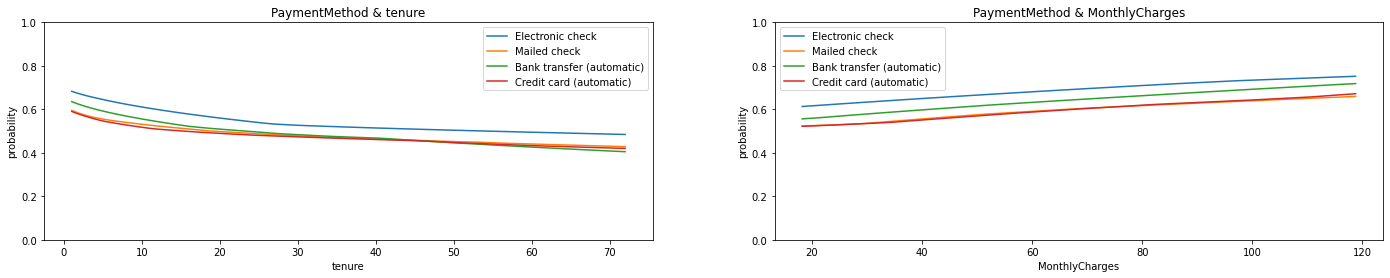

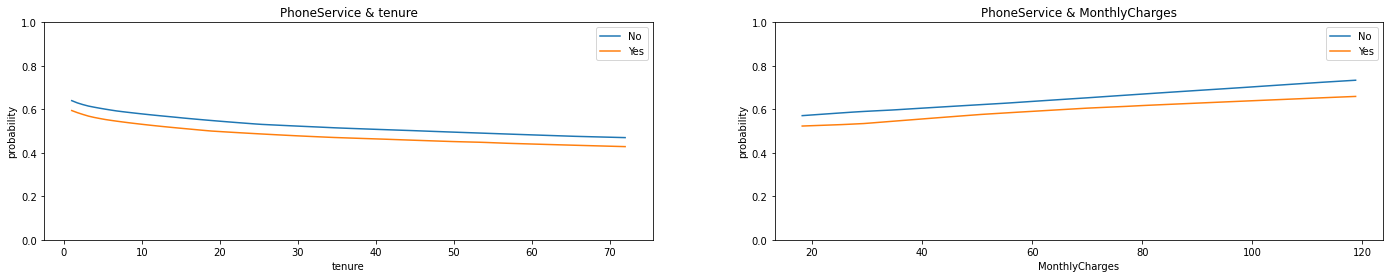

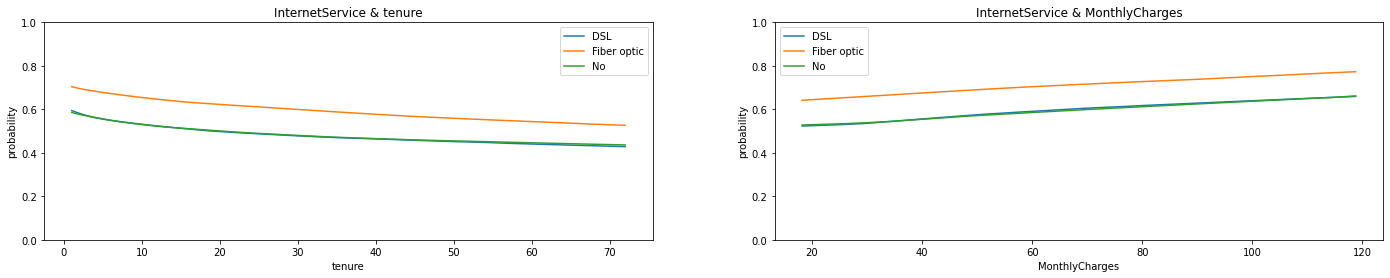

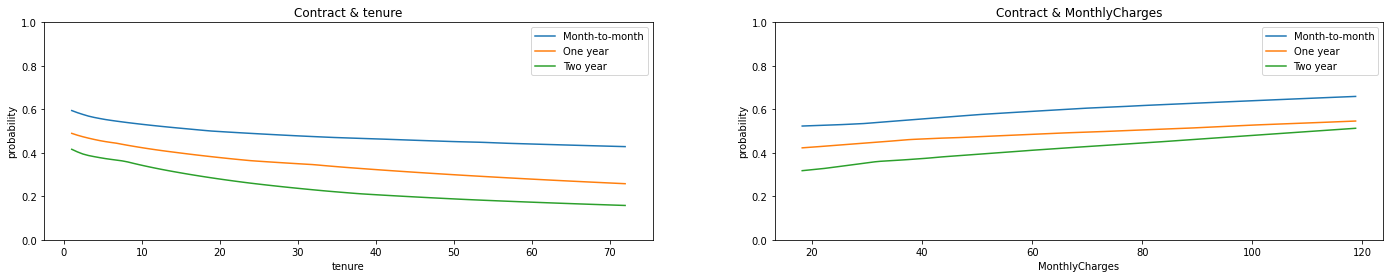

In [70]:
for col in ['PaymentMethod', 'PhoneService', 'InternetService', 'Contract', ]:
    fig, ax = plt.subplots(1, 2, figsize=(8 * 3, 4))
    input_sweep(model, preprocessing_pipeline, df, 'tenure', col, sample, ax=ax[0])
    input_sweep(model, preprocessing_pipeline, df, 'MonthlyCharges', col, sample, ax=ax[1])

> After looking at the response graph we can see that feature effecting the probability and i have the following conclusion.
>
>> the obvious one is MonthlyCharges, higher the value the higher probability of churn. this mean that the customer prefer to pay less for the service. which in this case maybe our competitor have more affordable service.
>>
>> the higher the tenure the lower the probability of churn. so in this case long time customer are less likely to churn.
>>
>> contract have significant effect so to keep our customer inside our service we should have long term contract this can be achieved by offering discounted contract plan.
>>
>> phone service have the lowest effect on the probability of churn. so if the customer prefer to use phone service they are less likely to churn.

> ## Practical Application
> after we're done training and evaluating the model we will use it to predict the churn of the new customer.
> in this set we have 561 customer, and we will use the model to predict the churn of the new customer. so we can put more effort to improve their loyalty.

In [71]:
test_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1605,Male,0,No,No,65,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.55,1218.65
2642,Female,0,Yes,No,47,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,85.30,4045.65
5474,Female,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.60,84.60
1603,Female,0,No,No,15,Yes,Yes,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),64.65,994.55
1091,Male,0,No,No,29,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),75.35,2243.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.05,7554.05
5566,Male,0,Yes,No,72,Yes,Yes,DSL,No,Yes,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),82.15,5784.30
7000,Female,0,No,No,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,20.55,1343.40
3895,Male,0,Yes,Yes,56,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.15,1402.25


> In This case we know that the distribution of the customer is as follows.
> - 402 non churn customer
> - 149 churn customer

In [72]:
test_y.value_counts()

False    412
True     149
Name: Churn, dtype: int64

> Finding Probability Threshold, we need to find the threshold because we need to adjust the tolerance of the model so the model still catch the churn customer. but still keep the number of non churn customer low. so in this case i will use the threshold of 0.6, so we will get approximately 60% of the churn customer.

In [73]:
THRESHOLD = 0.6
_x, _y = _val_ds
print(classification_report(model.predict(_x) > THRESHOLD, _y))

              precision    recall  f1-score   support

       False       0.82      0.87      0.84       964
        True       0.67      0.57      0.62       438

    accuracy                           0.78      1402
   macro avg       0.74      0.72      0.73      1402
weighted avg       0.77      0.78      0.77      1402



> ## Final Result
> we can see the model was able to catch 100 of 149 churn customer. with as we predicted before 60% of the churn customer was correctly predicted.
> and still maintaining the number of non churn customer low.

In [74]:
_x, _y = _test_ds
_prob = model(_x)[:, 0].numpy() > THRESHOLD
test_x[_prob]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2642,Female,0,Yes,No,47,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,85.30,4045.65
5474,Female,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.60,84.60
1603,Female,0,No,No,15,Yes,Yes,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),64.65,994.55
6046,Female,0,No,No,9,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.30,781.40
1808,Female,0,No,No,23,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,79.15,1676.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,Male,0,No,No,16,Yes,Yes,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),71.40,1212.10
6961,Female,0,Yes,No,24,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.40,1747.85
5943,Male,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,84.85,84.85
906,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,56.40,234.85


In [75]:
test_y[_prob].value_counts()

True     100
False     74
Name: Churn, dtype: int64

> ## Sanity Check (Manual Inference)
> this is the test to see how the model react to the new customer that was typed in the notebook. and i will simulate my self as the new customer.

In [76]:
_input = pd.DataFrame([{
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 65,
    'PhoneService': 'No',
    'MultipleLines': 'No Phone Service',
    'InternetService': 'Yes',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Two year',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Credit card (automatic)',
    'MonthlyCharges': 19.55,
    'TotalCharges': 1218.65
}])

_input = preprocessing_pipeline.transform(_input)

print(f"Probability of churn: {model(_input)[0, 0].numpy() * 100:.2f}%")

Probability of churn: 23.01%


# XI. Conclusion
> let's summarize what we got from this Journey.
>
>> this dataset contains missing value that was not NaN but it just 1 space, so we need to inspect the missing value using unique value or try-catch.
>>
>> by looking to the class distribution feature by feature we can have a clear idea about their correlation with the target variable. and from that information we can create appropriate model pipeline.
>>
>> this dataset contains imbalance class distribution, so we need to balance the dataset in this case i was use under-sampling technique in conjunction with class weight balancing. this was done so the model was not biased towards the majority class.
>>
>> in the model definition we created a baseline model consisting of one layer of dense layer with relu activation function and one layer of dense layer with sigmoid activation function.
>>
>> we use adam optimizer and binary crossentropy loss function. this specific parameter was chosen because adam optimizer tend to converge faster than other optimizers and binary crossentropy loss function is the most common 1 class loss function in deep learning.
>>
>> we use glorot_uniform initializer to initialize the weights.
>>
>> we use 4 different metric to evaluate the model performance this was done to choose the best model by 4 kind of metric.
>>
>> we use our baseline model to analyze the feature importance and hyperparameter consequence to the performance.
>>
>> we improve the new model based on the baseline weakness.
>>
>> we achieve accuracy of 77% by using the new model.
>>
>> we save the model and the preprocessing pipeline to use it in the dashboard.
>>
>> and from the latest model we can define what feature is important by the model point of view.
>
>> and from the batch customer churn we can catch around 60% of customer that will be churn and less than 10% of customer that will be non churn.
>
>> from the new customer simulation we cas see that we have successfully predicted that the new customer is not a churn customer.
>
> After this notebook was done we will start to make dashboard and backend to serve the model.